In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Fitness data set new.csv")
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Demand_Ratio,Peak_Demand
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,-0.480445,-0.588395,-1.694811,-0.328242,0
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,-0.480445,-0.276555,-1.694811,0.023511,0
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,-0.480445,-0.380501,-1.694811,-0.093740,0
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,-0.480445,-0.900235,-1.694811,-0.679995,0
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,-0.480445,-1.108129,-1.694811,-0.914497,0


In [8]:
df["BookingEndDateTime (Month / Day / Year)"] = pd.to_datetime(
    df["BookingEndDateTime (Month / Day / Year)"]
)

daily_demand = df.groupby(
    "BookingEndDateTime (Month / Day / Year)"
)["Number Booked"].sum()

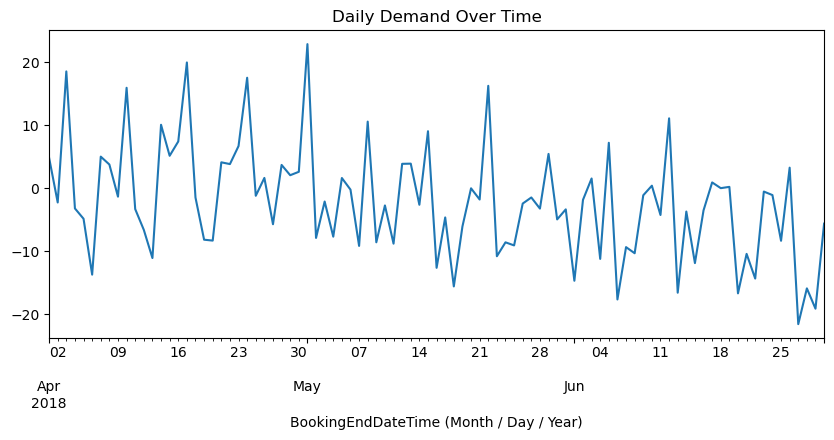

In [9]:
plt.figure(figsize=(10,4))
daily_demand.plot()
plt.title("Daily Demand Over Time")
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(daily_demand, order=(1,1,1))
model_fit = model_arima.fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
forecast = model_fit.forecast(steps=7)
forecast

2018-07-01   -7.781106
2018-07-02   -7.649076
2018-07-03   -7.657198
2018-07-04   -7.656699
2018-07-05   -7.656729
2018-07-06   -7.656727
2018-07-07   -7.656728
Freq: D, Name: predicted_mean, dtype: float64

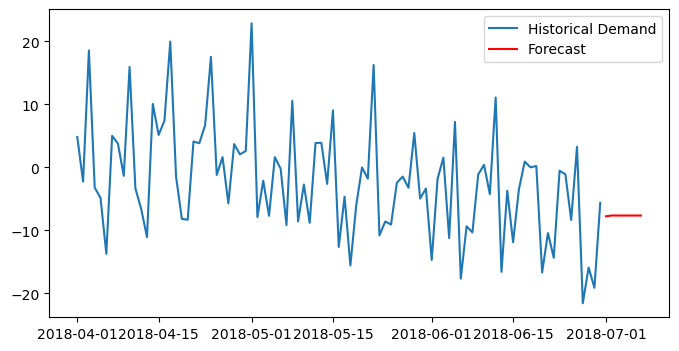

In [12]:
plt.figure(figsize=(8,4))
plt.plot(daily_demand, label="Historical Demand")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.show()